In [142]:
!pip install seaborn==0.11.0

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

pd.options.mode.chained_assignment = None

plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

In [144]:

countries = pd.read_csv("../input/global-warming-dataset/DA proj/GlobalLandTemperaturesByCity.csv")


countries['Date'] = pd.to_datetime(countries['dt'])
countries['year'] = countries['Date'].dt.year


by_year = countries.groupby(by = ['year', 'City', 'Country', 'Latitude', 'Longitude']).mean().reset_index()


continent_map = pd.read_csv("../input/global-warming-dataset/DA proj/continents2.csv")
continent_map['Country'] = continent_map['name']
continent_map = continent_map[['Country', 'region', 'alpha-2', 'alpha-3']]


data = pd.merge(left = by_year, right = continent_map, on = 'Country', how = 'left')


data = data[data['year'] >= 1825]



region = data.dropna(axis = 0).groupby(by = ['region', 'year']).mean().reset_index()
countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year']).mean().reset_index()
cities = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'City', 'year', 'Latitude', 'Longitude']).mean().reset_index()
Continent_df = data.copy()

In [145]:
data.tail()

,year,City,Country,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty,region,alpha-2,alpha-3
718326,2013,Århus,Denmark,57.05N,10.33E,8.497625,0.375250,Europe,DK,DNK
718327,2013,Çorlu,Turkey,40.99N,27.69E,15.796875,0.498125,Asia,TR,TUR
718328,2013,Çorum,Turkey,40.99N,34.08E,12.800375,0.379500,Asia,TR,TUR
718329,2013,Öskemen,Kazakhstan,50.63N,82.39E,4.595500,0.644250,Asia,KZ,KAZ
718330,2013,Ürümqi,China,44.20N,87.20E,9.472000,0.841000,Asia,CN,CHN


In [146]:
print("Total rows in the dataset:",data.count()["Country"])
print("Maximum recorded temperature:",data.max()["AverageTemperature"])
print("Minimum recorded temperature:",data.min()["AverageTemperature"])

Total rows in the dataset: 635085


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Maximum recorded temperature: 32.333
Minimum recorded temperature: -14.812000000000003


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [147]:
Region_data = data[data["region"]=="Americas"]
Region_data.head()

,year,City,Country,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty,region,alpha-2,alpha-3
83252,1825,Abilene,United States,32.95N,100.53W,17.149833,2.414167,Americas,US,USA
83254,1825,Acarigua,Venezuela,8.84N,68.92W,27.166333,1.719583,Americas,VE,VEN
83258,1825,Acuña,Mexico,29.74N,101.54W,19.556917,2.352500,Americas,MX,MEX
83276,1825,Akron,United States,40.99N,80.95W,10.322500,2.049750,Americas,US,USA
83285,1825,Albuquerque,United States,34.56N,107.03W,11.276750,2.345417,Americas,US,USA


In [148]:
print("Total rows in the dataset:",Region_data.count()["Country"])
print("Maximum recorded temperature:",Region_data.max()["AverageTemperature"])
print("Minimum recorded temperature:",Region_data.min()["AverageTemperature"])
print("Average recorded temperature:",Region_data.mean()["AverageTemperature"])

Total rows in the dataset: 151943
Maximum recorded temperature: 30.54133333333333
Minimum recorded temperature: -8.87625
Average recorded temperature: 18.52902571873155


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [149]:
Region_data.describe(include=['object'])

,City,Country,Latitude,Longitude,region,alpha-2,alpha-3
count,151943,151943,151943,151943,151943,151943,151943
unique,825,27,64,332,1,27,27
top,Springfield,United States,23.31S,46.31W,Americas,US,USA
freq,567,46926,12512,6916,151943,46926,46926


In [150]:
Region_data = Region_data.drop(["City","Country","Latitude","Longitude","alpha-2","alpha-3","region"],axis=1)
Region_data.head()

,year,AverageTemperature,AverageTemperatureUncertainty
83252,1825,17.149833,2.414167
83254,1825,27.166333,1.719583
83258,1825,19.556917,2.352500
83276,1825,10.322500,2.049750
83285,1825,11.276750,2.345417


In [151]:
Region_data.dtypes

year                               int64
AverageTemperature               float64
AverageTemperatureUncertainty    float64
dtype: object

In [152]:
Region_data.rename(columns = {'AverageTemperature':'temperature', 'AverageTemperatureUncertainty':'deviation'}, inplace = True)
Region_data.head()

,year,temperature,deviation
83252,1825,17.149833,2.414167
83254,1825,27.166333,1.719583
83258,1825,19.556917,2.352500
83276,1825,10.322500,2.049750
83285,1825,11.276750,2.345417


In [153]:
Region_data.index = np.arange(1, len(Region_data) + 1) 
Region_data.head()

,year,temperature,deviation
1,1825,17.149833,2.414167
2,1825,27.166333,1.719583
3,1825,19.556917,2.352500
4,1825,10.322500,2.049750
5,1825,11.276750,2.345417


In [154]:
missing_data = Region_data[Region_data.isnull().any(axis=1)]
print("Total rows with missing data:",len(missing_data))

Total rows with missing data: 3978


<AxesSubplot:>

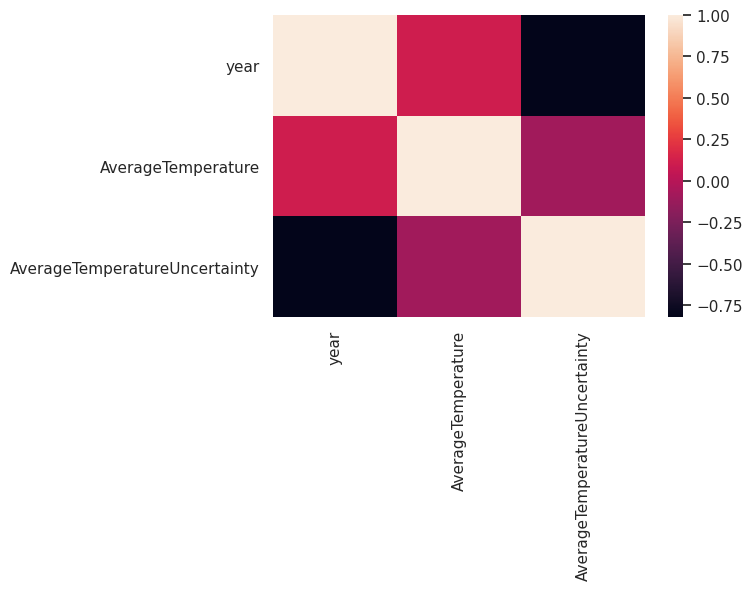

In [155]:
Continent_df = Continent_df.dropna()
sns.heatmap(Continent_df.corr())

<AxesSubplot:xlabel='year', ylabel='count'>

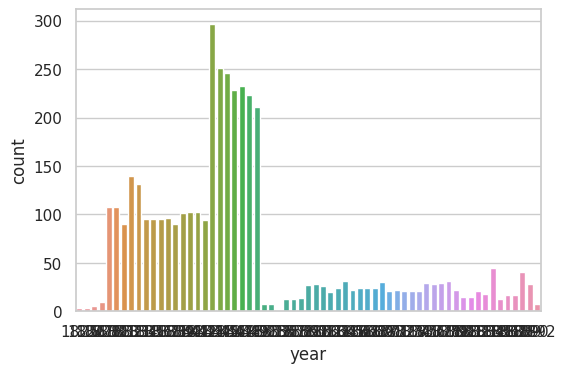

In [156]:
sns.countplot(x="year", data=missing_data)

In [157]:
print("Number of rows before removing missing data:",len(Region_data))
Region_data = Region_data.dropna()
print("Number of rows after removing missing data:",len(Region_data))

Number of rows before removing missing data: 151943
Number of rows after removing missing data: 147965


<AxesSubplot:xlabel='year', ylabel='temperature'>

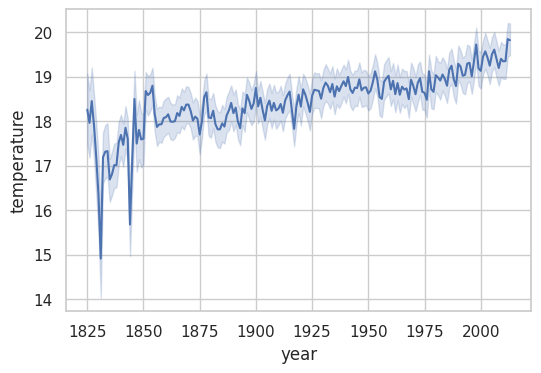

In [158]:
sns.lineplot(data=Region_data, x="year", y="temperature")

<AxesSubplot:xlabel='year', ylabel='temperature'>

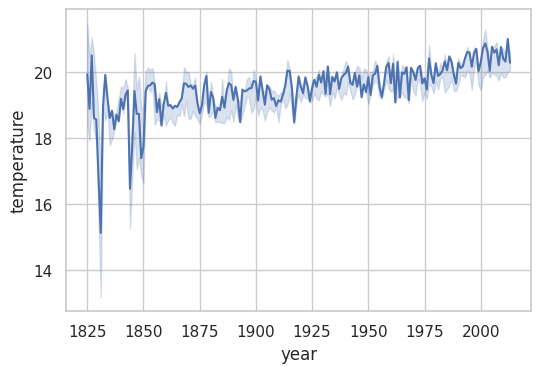

In [159]:
sns.lineplot(data=Region_data, x="year", y="temperature", estimator=np.median)

<AxesSubplot:xlabel='year', ylabel='deviation'>

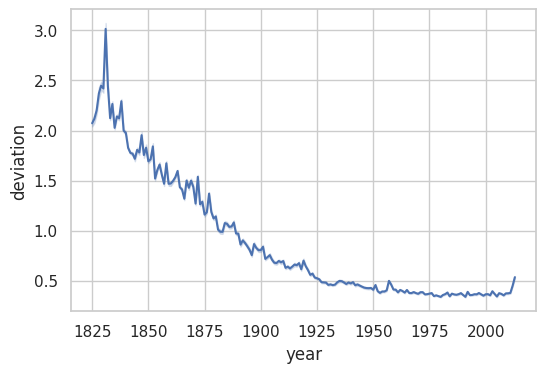

In [160]:
sns.lineplot(x="year", y="deviation", data=Region_data)

<AxesSubplot:xlabel='temperature', ylabel='deviation'>

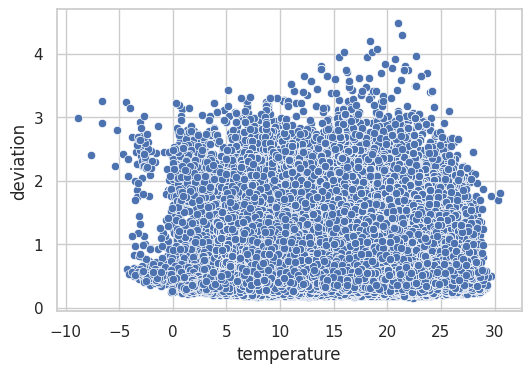

In [161]:
sns.scatterplot(data=Region_data, x="temperature", y="deviation")

count    147965.000000
mean         18.529026
std           5.994465
min          -8.876250
25%          15.286000
50%          19.537167
75%          23.179333
max          30.541333
Name: temperature, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



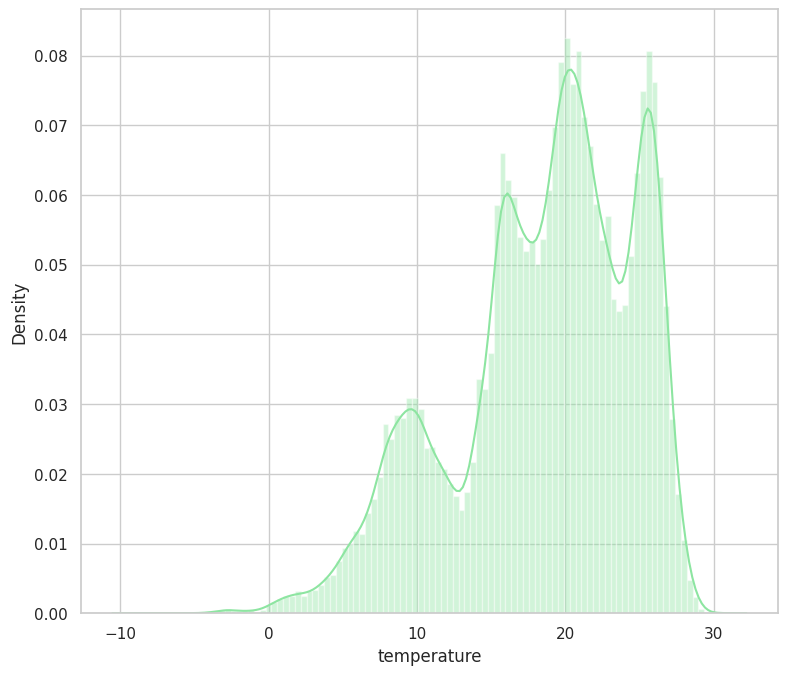

In [162]:
print(Region_data['temperature'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(Region_data['temperature'], color='g', bins=100, hist_kws={'alpha': 0.4});

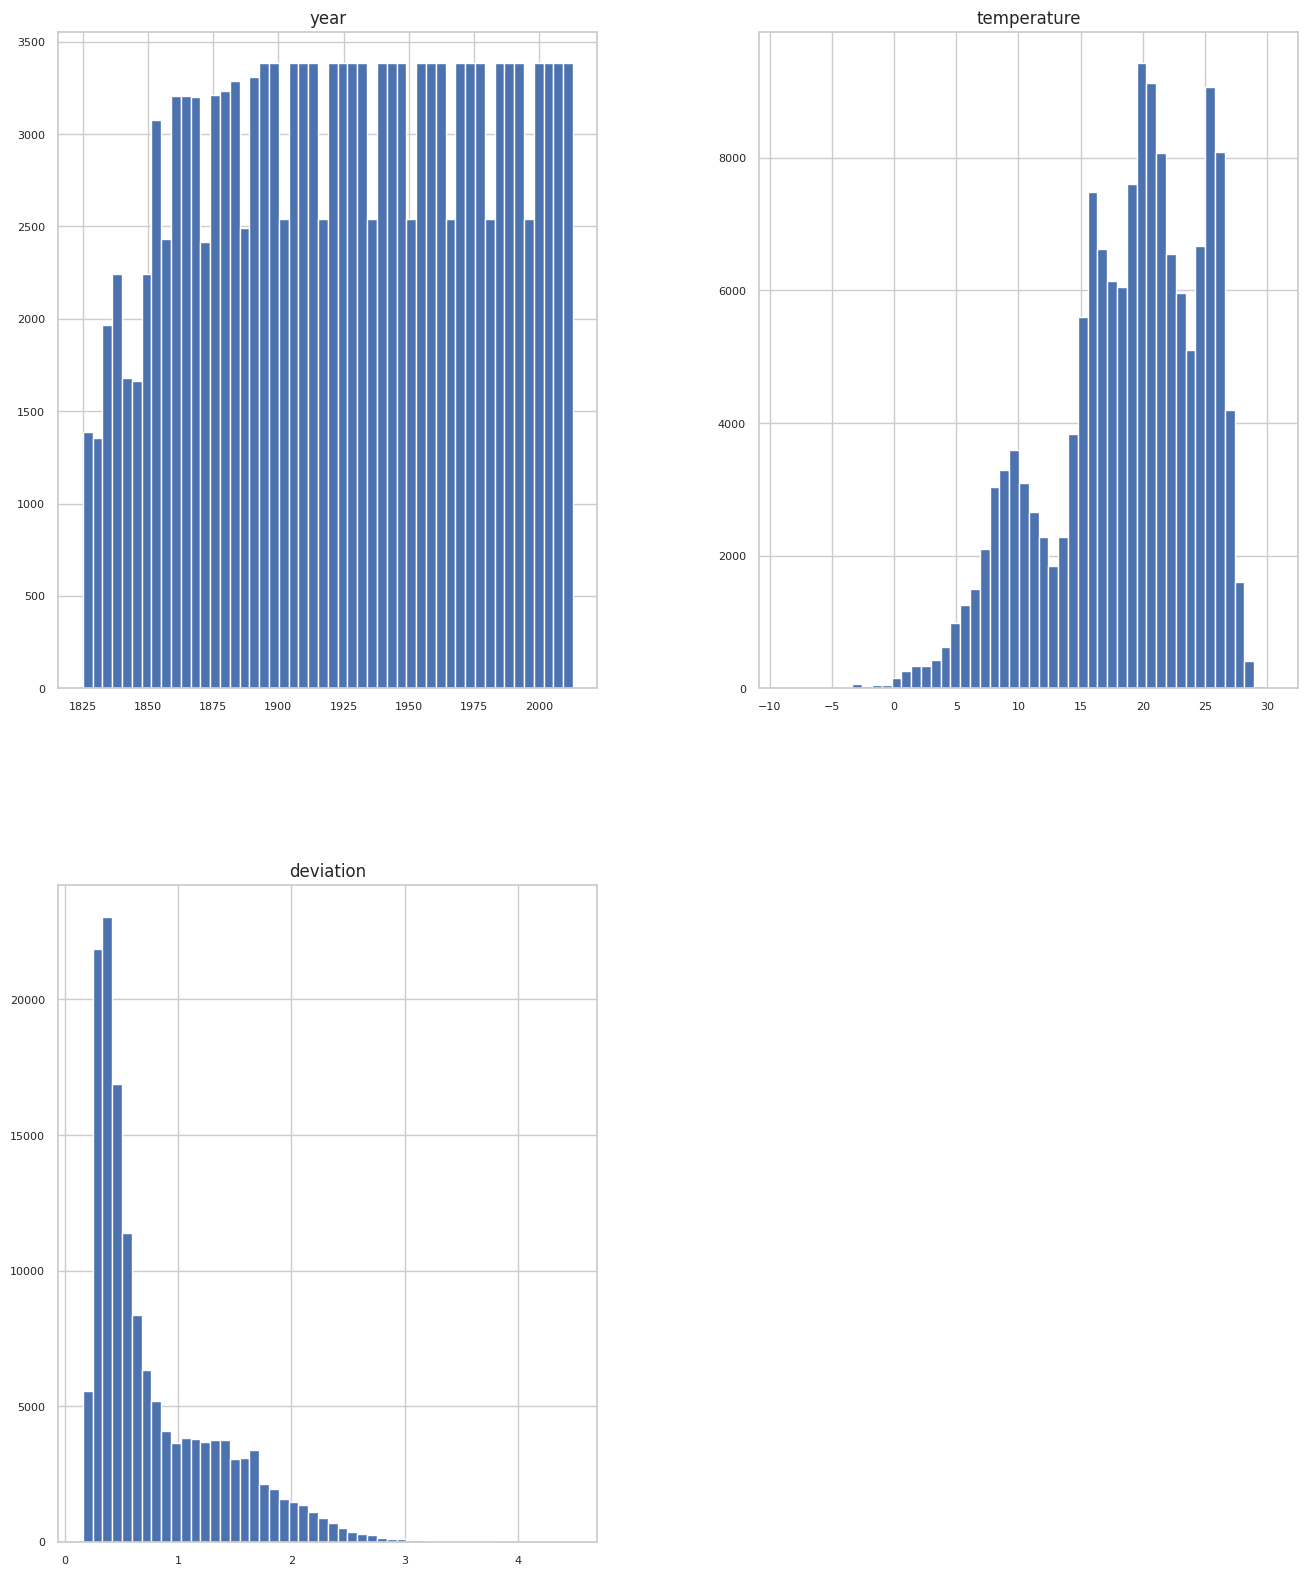

In [164]:
Region_data = Region_data.select_dtypes(include = ['float64', 'int64'])
Region_data.head()
Region_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);